# <span style="color:darkblue"> Lecture 12b - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> II. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,242
Treatment,156


col_0,Frequency
status,
Control,0.60804
Treatment,0.39196


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,156.000000,156.000000,156.000000,156.000000,156.000000
mean,23.835256,5.500000,192.076923,2959.051282,15.675641
std,8.442525,1.735772,103.970066,846.103416,2.932628
min,9.000000,4.000000,68.000000,1755.000000,8.000000
25%,16.425000,4.000000,103.250000,2251.750000,13.975000
50%,23.000000,4.000000,145.000000,2792.500000,15.500000
75%,30.000000,8.000000,302.000000,3633.750000,17.300000
max,46.600000,8.000000,455.000000,4997.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,242.000000,242.000000,242.000000,242.000000,242.000000
mean,23.307851,5.425620,194.297521,2977.756198,15.498760
std,7.394732,1.681189,104.666722,848.989349,2.642699
min,10.000000,3.000000,70.000000,1613.000000,8.500000
25%,17.625000,4.000000,104.250000,2220.000000,13.725000
50%,22.750000,4.000000,151.000000,2837.500000,15.500000
75%,29.000000,6.000000,258.000000,3573.000000,17.000000
max,44.600000,8.000000,455.000000,5140.000000,24.800000


<font size = "5">

Exercises:

Import the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting

<font size = "5">

Try it yourself!

<font size = "3">

- Create ``` list_status = [0,1]```
- Create ``` list_prob = [0.5, 0.5]```
- Create a new variable $n$ with the number of rows of the dataset
- Use 
```python
    np.random.choice(list_status,
                     size = n,
                     p = list_prob)
```
$\qquad$ to create a new column called "status" <br>
$\qquad$ which randomly assigns each row to "0" or "1" <br>
$\qquad$ with equal probability
- Use .query() to subset all observations with status == 0.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with status == 1.<br>
store it in a new dataset called "data1"



In [9]:
# Write your own code

players = pd.read_csv("data_raw/fifa23_players_basic.csv")

players.columns

list_status = [0,1]
list_prob = [0.5,0.5]

players["status"] = np.random.choice(list_status,
                                         size = len(players),
                                         p = list_prob)

data0 = players.query("status ==0")
data1 = players.query("status ==1")

display(data0.describe())
display(data1.describe())

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,Skill Moves,International Reputation,status
count,9280.000000,9280.000000,9.280000e+03,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9.280000e+03,9280.000000,9280.000000,9280.000000,9280.000000,9280.0
mean,65.851401,70.964224,2.844882e+06,25.282759,181.486099,75.103233,1602.643427,358.080603,8918.852371,5.034278e+06,2020.360560,2.947198,2.370690,1.084591,0.0
std,6.765116,6.186369,7.513823e+06,4.705167,6.897602,6.957534,274.532911,39.601362,19741.247272,1.452081e+07,2.110422,0.669097,0.778305,0.357000,0.0
min,47.000000,48.000000,0.000000e+00,16.000000,156.000000,49.000000,759.000000,226.000000,0.000000,0.000000e+00,2002.000000,1.000000,1.000000,1.000000,0.0
25%,62.000000,67.000000,4.750000e+05,22.000000,177.000000,70.000000,1469.000000,331.000000,1000.000000,6.560000e+05,2020.000000,3.000000,2.000000,1.000000,0.0
50%,66.000000,71.000000,9.750000e+05,25.000000,182.000000,75.000000,1641.000000,358.000000,3000.000000,1.500000e+06,2021.000000,3.000000,2.000000,1.000000,0.0
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1788.000000,385.000000,8000.000000,3.300000e+06,2022.000000,3.000000,3.000000,1.000000,0.0
max,91.000000,93.000000,1.165000e+08,44.000000,206.000000,102.000000,2303.000000,501.000000,420000.000000,2.610000e+08,2022.000000,5.000000,5.000000,5.000000,0.0


,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,Joined On,Weak Foot Rating,Skill Moves,International Reputation,status
count,9259.000000,9259.00000,9.259000e+03,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000,9259.000000,9.259000e+03,9259.000000,9259.000000,9259.000000,9259.000000,9259.0
mean,65.852684,71.06923,2.906110e+06,25.197970,181.615725,75.244735,1601.584512,357.811535,8730.008640,5.129206e+06,2020.374338,2.945674,2.361594,1.088022,1.0
std,6.811928,6.19926,7.755091e+06,4.731025,6.818028,7.069001,271.791288,39.656881,19175.656268,1.482269e+07,2.000825,0.678471,0.766507,0.360513,0.0
min,47.000000,49.00000,0.000000e+00,16.000000,155.000000,54.000000,762.000000,224.000000,0.000000,0.000000e+00,2005.000000,1.000000,1.000000,1.000000,1.0
25%,62.000000,67.00000,5.000000e+05,21.000000,177.000000,70.000000,1471.000000,331.000000,1000.000000,6.770000e+05,2020.000000,3.000000,2.000000,1.000000,1.0
50%,66.000000,71.00000,1.000000e+06,25.000000,182.000000,75.000000,1639.000000,358.000000,3000.000000,1.500000e+06,2021.000000,3.000000,2.000000,1.000000,1.0
75%,70.000000,75.00000,2.000000e+06,29.000000,186.000000,80.000000,1784.000000,385.000000,7000.000000,3.400000e+06,2022.000000,3.000000,3.000000,1.000000,1.0
max,91.000000,95.00000,1.905000e+08,42.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,2022.000000,5.000000,5.000000,5.000000,1.0


<font size = "5">

Try it yourself!

<font size = "3">

- This question requires the two datasets you created in the previous question
- Display the distribution of "Age" for "data0" and "data1"
- Use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

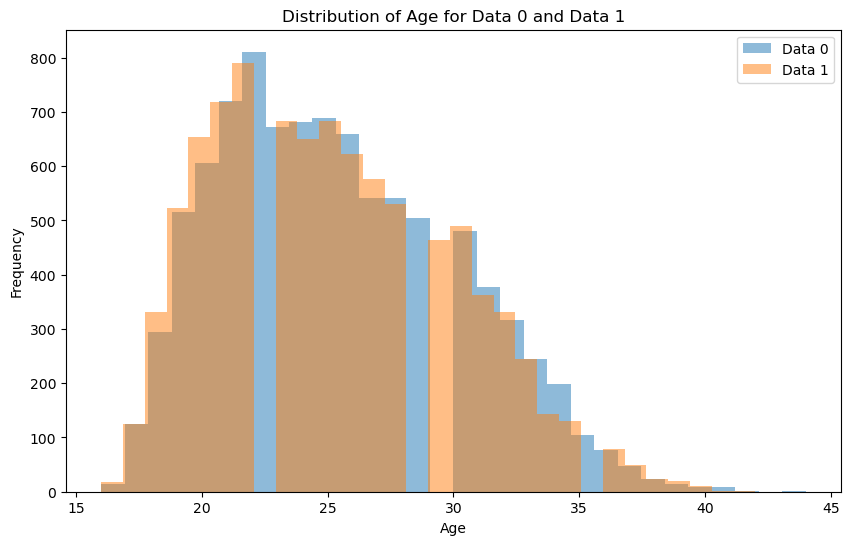

In [10]:
# Write your own code
plt.figure(figsize=(10, 6))
plt.hist(data0['Age'], alpha=0.5, label='Data 0', bins=30)
plt.hist(data1['Age'], alpha=0.5, label='Data 1', bins=30)
plt.title('Distribution of Age for Data 0 and Data 1')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()




# <span style="color:darkblue"> III. Further information </span>

<font size = "5">

https://discovery.cs.illinois.edu/learn/Basics-of-Data-Science-with-Python/Experimental-Design-and-Blocking/